In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from context import km3net
from km3net.utils import DATADIR
from km3net.model.gnn import create_sparse_matrix

import networkx as nx

In [2]:
df = pd.read_csv(DATADIR+'/processed/slice-615.csv')
df = df.sample(frac=0.01)
events = df[df.label == 1]
noise = df[df.label == 0]
print('events shape: {0}, noise shape: {1}'.format(events.shape, noise.shape))

events shape: (14, 7), noise shape: (71, 7)


In [3]:
matx = create_sparse_matrix(df['event_id'].values)
events_matx = create_sparse_matrix(events['event_id'].values)
noise_matx = create_sparse_matrix(noise['event_id'].values)

In [4]:
G = nx.from_numpy_matrix(matx)
eG = nx.from_numpy_matrix(events_matx)
nG = nx.from_numpy_matrix(noise_matx)

In [5]:
pos = nx.kamada_kawai_layout(G)
epos = nx.kamada_kawai_layout(eG)
npos = nx.kamada_kawai_layout(nG)

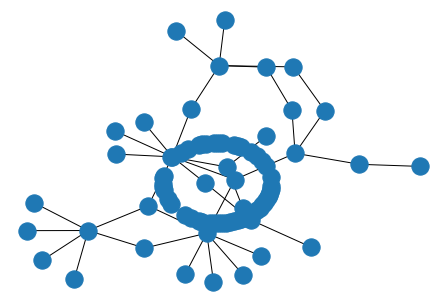

In [6]:
nx.draw(G, pos, label=True)

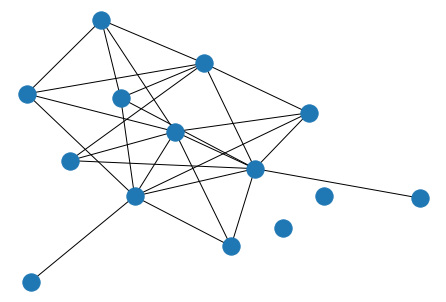

In [7]:
nx.draw(eG, epos)

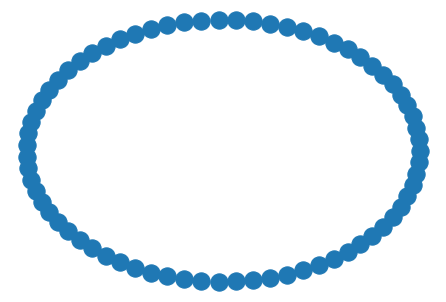

In [8]:
nx.draw(nG, npos)